In [4]:
import yfinance as yf

In [5]:
ticker = input('Digite o código da ação: ')
dados = yf.Ticker(ticker).history('2y')
dados.head()

Digite o código da ação: PETR4.SA


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-07 00:00:00-03:00,12.454111,12.475960,12.239987,12.362344,74548900,0.0,0.0
2021-06-08 00:00:00-03:00,12.309905,12.585206,12.218137,12.524028,88398600,0.0,0.0
2021-06-09 00:00:00-03:00,12.550247,12.707562,12.462850,12.524028,60724200,0.0,0.0
2021-06-10 00:00:00-03:00,12.598315,12.685713,12.484699,12.532767,35871000,0.0,0.0
2021-06-11 00:00:00-03:00,12.585206,12.607056,12.349234,12.484699,54894400,0.0,0.0


<Axes: xlabel='Date'>

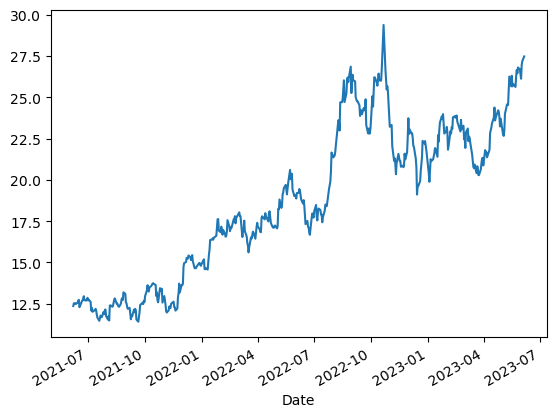

In [7]:
dados['Close'].plot()

# Tratamento de dados

In [13]:
treinamento = dados.reset_index()
treinamento = treinamento[['Date', 'Close']]
treinamento["Date"] = treinamento["Date"].dt.tz_localize(None)
treinamento.columns = ['ds', 'y']
treinamento

,ds,y
0,2021-06-07,12.362344
1,2021-06-08,12.524028
2,2021-06-09,12.524028
3,2021-06-10,12.532767
4,2021-06-11,12.484699
...,...,...
494,2023-05-30,26.389999
495,2023-05-31,26.120001
496,2023-06-01,26.959999
497,2023-06-02,27.180000


# Treinando o modelo de Machine Learning

In [17]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [19]:
#criar modelo
modelo = Prophet()

In [20]:
#treinar modelo
modelo.fit(treinamento)

20:23:27 - cmdstanpy - INFO - Chain [1] start processing
20:23:27 - cmdstanpy - INFO - Chain [1] done processing


# Realizar previsões

In [25]:
periodo = modelo.make_future_dataframe(90)

In [26]:
previsoes = modelo.predict(periodo)

In [27]:
plot_plotly(modelo, previsoes)